In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import os
import json
with open('hateandloathing.txt', 'r', encoding = 'utf-8') as a:
    text = a.read()

## Задание 1. 

Импортируем все необходимое. Токенизируем текст, как уже делали это раньше. Задаем список возможных частей речи, с помощью него затем избавляемся от слов "без части речи" (в моем тексте это слова латиницей, которые пайморфи не анализирует). Анализируем каждый токен, если у него нет части речи -- не включаем его в наш будущий словарь (отсекаем с помощью if). Задаем пустой словарь класса *ordereddict*, чтобы затем наши столбцы были в правильной последовательности. Поочередно задаем пары ключ-значение для всех нужных нам параметров морф. разбора. Добавляем проанализированное слово (точнее, получившийся из него словарь) в список. Повторяем для каждого слова в тексте. Когда процесс завершен, создаем из списка словарей таблицу с помощью функции *pd.DataFrame*.

In [3]:
import collections
from pymorphy2 import MorphAnalyzer
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
text_py1 = []
listi = []
morph = MorphAnalyzer()
text_py = [w.lower() for w in word_tokenize(text) if w.isalpha()]
valid = ['NPRO', 'ADVB', 'PREP', 'ADJS', 'PRTF', 'VERB', 'COMP', 'NUMR', 'INFN', 'GRND',
         'PRTS', 'PRED', 'CONJ', 'NOUN', 'INTJ', 'PRCL', 'ADJF']
for word in text_py:
    dicti = collections.OrderedDict()
    new_word = morph.parse(word)
    p = new_word[0]
    if p.tag.POS in valid:
        dicti["lex"] = p.normal_form 
        dicti["word"] = p.word
        dicti["part of speech"] = p.tag.POS
        dicti['animacy'] = p.tag.animacy
        dicti['aspect'] = p.tag.aspect
        dicti['case'] = p.tag.case
        dicti['gender'] = p.tag.gender
        dicti['involvement'] = p.tag.involvement
        dicti['mood'] = p.tag.mood
        dicti['number'] = p.tag.number
        dicti['person'] = p.tag.person
        dicti['tense'] = p.tag.tense
        dicti['transitivity'] = p.tag.transitivity
        dicti['voice'] = p.tag.voice
        listi.append(dicti)
df = pd.DataFrame(listi)
df.head(15)

,lex,word,part of speech,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,хантереть,хантёр,VERB,None,impf,None,masc,None,indc,sing,None,past,tran,None
1,томпсон,томпсон,NOUN,anim,None,nomn,masc,None,None,sing,None,None,None,None
2,страх,страх,ADVB,None,None,None,None,None,None,None,None,None,None,None
3,и,и,CONJ,None,None,None,None,None,None,None,None,None,None,None
4,отвращение,отвращение,NOUN,inan,None,accs,neut,None,None,sing,None,None,None,None
5,в,в,PREP,None,None,None,None,None,None,None,None,None,None,None
6,дикий,дикое,ADJF,None,None,nomn,neut,None,None,sing,None,None,None,None
7,путешествие,путешествие,NOUN,inan,None,accs,neut,None,None,sing,None,None,None,None
8,в,в,PREP,None,None,None,None,None,None,None,None,None,None,None
9,сердце,сердце,NOUN,inan,None,nomn,neut,None,None,sing,None,None,None,None


## Задания 2. Графики как в конспекте.

### 2.0. Барчарт для рода 
(не оценивайте, пожалуйста, эту пробу пера, там дальше более интересный барчарт)

Text(0, 0.5, 'number of entries')

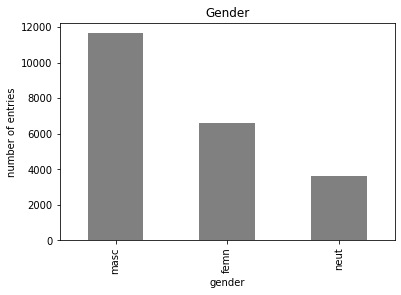

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
df['gender'].value_counts().plot.bar(color='grey'); 
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries')

### 2.1. Pie chart для лица глагола

Text(0.5, 1.0, 'Person')

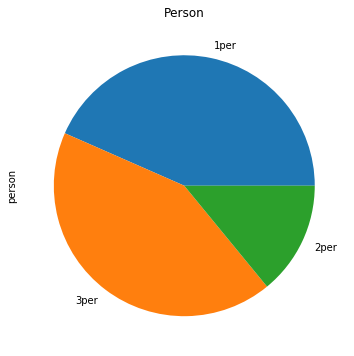

In [5]:
plt.figure(figsize=(6, 6))
df['person'].value_counts().plot(kind='pie');
plt.title('Person')

### 2.2. Гистограмма для длины слов.

Text(0.5, 0, 'Length of word')

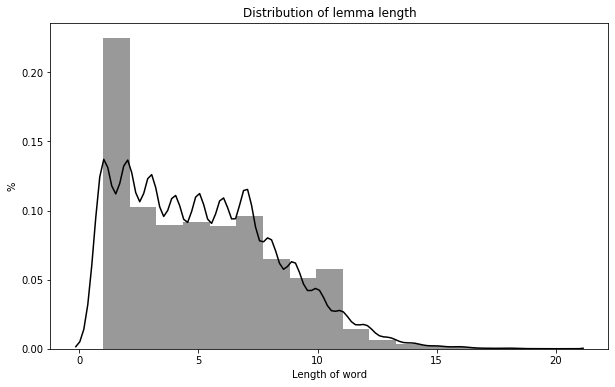

In [6]:
df['length'] = df['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df['length'], bins=17, color='black')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word')

### 2.3. Облако слов для всего текста

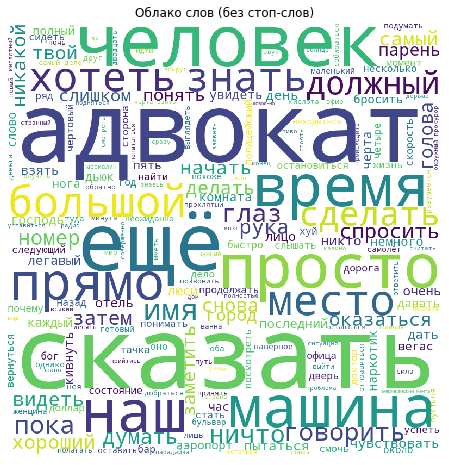

In [7]:
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])
text_1 = ' '.join(df['lex'])

text_11 = ' '.join([word for word in df['lex'].values if word not in stops])
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text_11)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (без стоп-слов)')
plt.show()

## Задание 3. Модифицированные графики.

### 3.0. Облако слов для существительных. Не на оценку

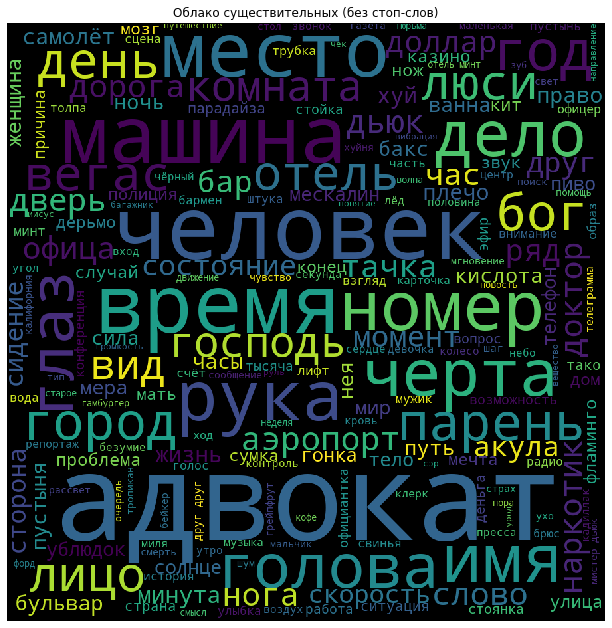

In [8]:
nouns = []
text_py = [w.lower() for w in word_tokenize(text) if w.isalpha()]
for word in text_py:
    new_word = morph.parse(word)
    new_word1 = new_word[0]
    if 'NOUN' in new_word1.tag:
        nouns.append(new_word1.normal_form)
text_nouns = ' '.join([word for word in nouns if word not in stops])
wordcloud = WordCloud(
    background_color ='black',
    width = 900,
    height = 900, 
).generate(text_nouns)
plt.figure(figsize = (11, 11), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако существительных (без стоп-слов)')
plt.show()

### Задание 3.1. Барчарт для предметов и понятий.

Я использую барчарт, чтобы показать, какие неодушевленные объекты и понятия упоминались в книге чаще всего. Это удобно, потому что по оси X мы можем отложить сами названия объектов, а по оси Y, соответственно, количество их упоминаний. Мы изучаем несколько объектов, поэтому гистограмма, демонстрирующая особенности только одного объекта, нам бы не подошла. Для категориальных значений лучше использовать барчарт, что я и делаю.


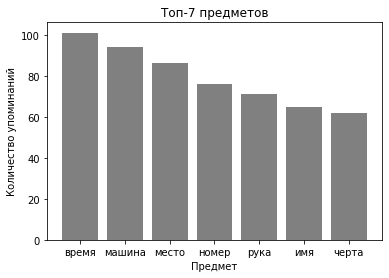

In [9]:
inanim = []
for word in text_py:
    new_word = morph.parse(word)
    p = new_word[0]
    if p.tag.POS == 'NOUN' and p.tag.animacy == 'inan':
        inanim.append(p.normal_form)
inanim_new = collections.Counter(inanim)
top = inanim_new.most_common(7)
obj = []
for i in top:
    obj.append(i[0])
number = []
for i in top:
    number.append(i[1])
plt.bar(obj, number, color='grey')
plt.title('Топ-7 предметов')
plt.ylabel('Количество упоминаний')
plt.xlabel('Предмет')
plt.show()

### Задание 3.2. Обычный график: упоминания адвоката.

Здесь я использовала обычный график, потому что по оси X откладывала значения, соответствующие определенным временым рамкам повествования, и мне было интересно увидеть изменение количества упоминаний второстепенного персонажа на протяжении всего повествования. Поскольку я рассматривала только одну переменную, мне не нужен был барчарт. Такой график, как использованный мной, традиционно выбирается для исследований на протяжении некоторого времени, поэтому я и выбрала его.

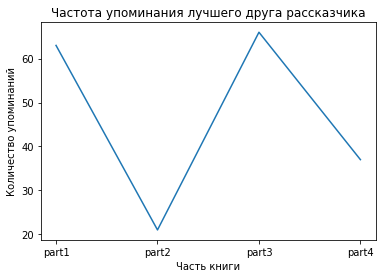

In [10]:
text_py = [w.lower() for w in word_tokenize(text) if w.isalpha()]
a = len(text_py)
counter1 = 0
counter2 = 0
counter3 = 0
counter4 = 0
for word in text_py[:int(a / 4)]:
    if word == 'адвокат':
        counter1 += 1
for word in text_py[int(a / 4):int(a / 2)]:
    if word == 'адвокат':
        counter2 += 1
for word in text_py[int(a / 2):int(a * 3 / 4)]:
    if word == 'адвокат':
        counter3 += 1
for word in text_py[int(a * 3 / 4):a]:
    if word == 'адвокат':
        counter4 += 1
X = ['part1', 'part2', 'part3', 'part4']
Y = [counter1, counter2, counter3, counter4]
plt.plot(X, Y) 
plt.title('Частота упоминания лучшего друга рассказчика') 
plt.ylabel('Количество упоминаний')
plt.xlabel('Часть книги') 
plt.show()

## Задание 4. Lexical Dispersion Plot.

Я токенизировала исходный текст, чтобы не упустить никакие упоминания персонажей. Задала список из наименований трех наиболее часто упоминающихся героев, а затем воспользовалась функцией *nltk.draw.dispersion.dispersion_plot*, в которой в качестве обрабатываемого указала токенизированный текст, а в качестве анализируемых значений -- список персонажей. Третья переменная -- название графика.

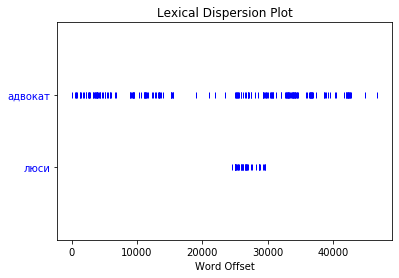

In [11]:
tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
words = ['адвокат', 'люси']
nltk.draw.dispersion.dispersion_plot(tokens, words, title='Lexical Dispersion Plot')